In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [60]:
airbnb_data = pd.read_csv("cities_with_all_interests_crimes.csv")
airbnb_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year,# point of interest,crime counts
0,27402246,171503602,0,0,f,1.0,"Los Angeles, CA, United States",Echo Park,Echo Park,City of Los Angeles,...,100.0,10.0,10.0,10.0,10.0,0.19,47879.0,2019.0,19.0,2740.0
1,5627346,9355137,within an hour,100%,f,2.0,"Los Angeles, CA, United States",Cahuenga Pass,Hollywood Hills,City of Los Angeles,...,98.0,10.0,10.0,10.0,10.0,0.16,47879.0,2019.0,20.0,0.0
2,39090938,299617303,within an hour,100%,f,0.0,"Los Angeles, CA, United States",Mid-Wilshire,East Hollywood,City of Los Angeles,...,93.0,9.0,9.0,10.0,9.0,1.70,47879.0,2019.0,20.0,2234.0
3,20678163,4271811,0,0,f,2.0,"Los Angeles, CA, United States",Mar Vista,Mar Vista,City of Los Angeles,...,95.0,10.0,10.0,10.0,10.0,0.26,47879.0,2019.0,8.0,0.0
4,5299075,3118435,within a few hours,93%,f,9.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,87.0,9.0,9.0,10.0,9.0,0.97,7166.0,2019.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21612110,157214926,within an hour,93%,f,1.0,"Long Beach, CA, United States",Long Beach,Long Beach,Other Cities,...,90.0,9.0,9.0,9.0,8.0,2.99,148.0,2019.0,20.0,0.0
996,34204446,48005494,within a few hours,99%,t,1759.0,"Los Angeles, CA, United States",Downtown,Downtown,City of Los Angeles,...,100.0,10.0,8.0,10.0,10.0,0.30,47879.0,2019.0,20.0,15717.0
997,13492765,12808522,within an hour,100%,t,2.0,"Los Angeles, CA, United States",Mid-Wilshire,Larchmont,City of Los Angeles,...,99.0,10.0,10.0,10.0,10.0,5.90,47879.0,2019.0,20.0,226.0
998,25484807,45784450,within an hour,100%,f,8.0,"Los Angeles, CA, United States",Mid-Wilshire,Pico-Union,City of Los Angeles,...,92.0,10.0,9.0,10.0,9.0,1.13,47879.0,2019.0,20.0,6998.0


In [61]:
# Create a function to create Linear Regression plots and scatter chart, and print the r-squared
# If the r-squared is close to 1.00, it shows there is a strong correlation between x and y
def linear_regression_plot(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stdrr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(f"{y_label} vs. {x_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_values.median()-2,y_values.min()+1),fontsize=15,color="red")
    plt.show()

The r-squared is: 0.03882833549308283


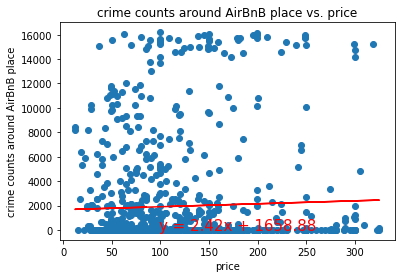

In [62]:
# compared price with crime counts
# the r-squared is low. there is no strong correlation between them
values_x = airbnb_data['price']
values_y = airbnb_data['crime counts']
label_x = "price"
label_y = "crime counts around AirBnB place"
linear_regression_plot(values_x, values_y, label_x, label_y)

In [63]:
#find the average crime count
average_crime_counts = round(airbnb_data['crime counts'].mean(),0)
print(f"average number for crime counts: {average_crime_counts}")

#separte the airbnb data by the average crime count (1945.00)
data_above_average_crime = airbnb_data.loc[airbnb_data['crime counts']>average_crime_counts]
data_below_average_crime = airbnb_data.loc[airbnb_data['crime counts']<=average_crime_counts]


numbers = [data_above_average_crime['id'].count(), data_below_average_crime['id'].count()]
average_prices = [round(data_above_average_crime['price'].mean(),2), round(data_below_average_crime['price'].mean(),2)]
print(f"number of AirBnB places has crime count above the average crime count: {numbers[0]}")
print(f"number of AirBnB places has crime count below the average crime count: {numbers[1]}")
print(f"average price of AirBnB places has crime count above the average crime count: ${average_prices[0]}")
print(f"average price of AirBnB places has crime count below the average crime count: ${average_prices[1]}")

average number for crime counts: 1945.0
number of AirBnB places has crime count above the average crime count: 224
number of AirBnB places has crime count below the average crime count: 776
average price of AirBnB places has crime count above the average crime count: $112.44
average price of AirBnB places has crime count below the average crime count: $119.96


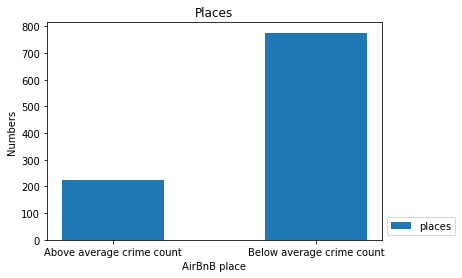

In [64]:
#create the bar chart for numbers of AirBnB places above/below average crime count
tick_labels = ['Above average crime count', 'Below average crime count']
x_axis = np.arange(len(numbers))
width = 0.5
tick_locations = [value for value in x_axis]
plt.bar(x_axis, numbers, align="center", width=width)
plt.xticks(tick_locations, tick_labels)
legends = ['places']
plt.title('Places')
plt.xlabel('AirBnB place')
plt.ylabel('Numbers')
plt.legend(legends, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

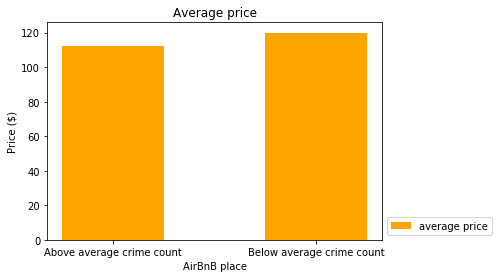

In [65]:
#create the bar chart for average prices of AirBnB places above/below average crime count
plt.bar(x_axis,average_prices, align="center", width=width, color='orange')
plt.xticks(tick_locations, tick_labels)
legends = ['average price']
plt.title('Average price')
plt.xlabel('AirBnB place')
plt.ylabel('Price ($)')
plt.legend(legends, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

The r-squared is: 0.007894836636404367


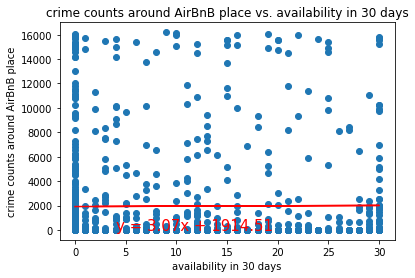

In [66]:
# Availability in 30 days compared with crime counts
# the r-squared is low. there is no strong correlation between them
values_x = airbnb_data['availability_30']
values_y = airbnb_data['crime counts']
label_x = "availability in 30 days"
label_y = "crime counts around AirBnB place"
linear_regression_plot(values_x, values_y, label_x, label_y)

The r-squared is: -0.09295723349689798


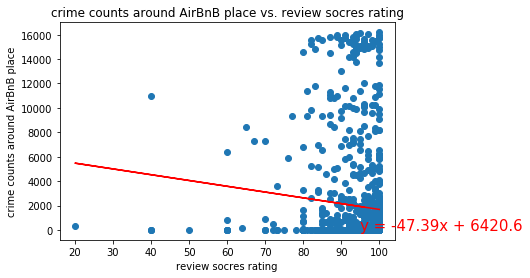

In [67]:
# Review scores rating compared with crime counts
# the r-squared is low. there is no strong correlation between them
values_x = airbnb_data['review_scores_rating']
values_y = airbnb_data['crime counts']
label_x = "review socres rating"
label_y = "crime counts around AirBnB place"
linear_regression_plot(values_x, values_y, label_x, label_y)